In [ ]:
#C:\Users\Sarthak\Pictures\Camera Roll\WIN_20190621_13_29_20_Pro.jpg
#C:\Users\Sarthak\Desktop\IMG_20181226_124223

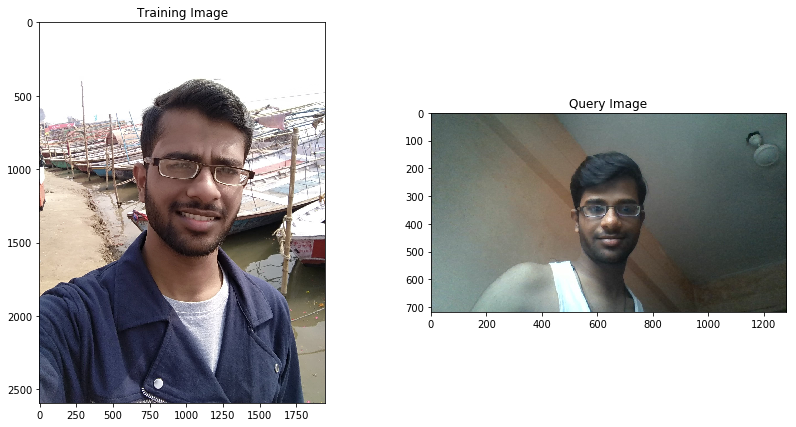

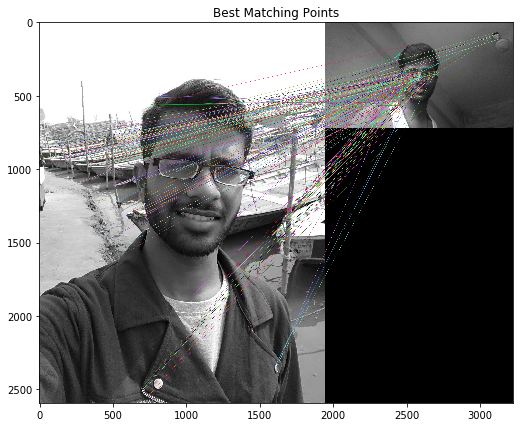

Number of Keypoints Detected In The Training Image:  972
Number of Keypoints Detected In The Query Image:  324

Number of Matching Keypoints Between The Training and Query Images:  216


In [3]:
import cv2
import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread(r'C:\Users\Sarthak\Desktop\IMG_20181226_124223.jpg')

# Load the query image
image2 = cv2.imread(r'C:\Users\Sarthak\Pictures\Camera Roll\WIN_20190621_13_29_20_Pro.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_image)
plt.show()

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(1000, 2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create a Brute Force Matcher object. Set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 300 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:300], query_gray, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [32]:
#image1 = cv2.imread(r'C:\Users\Sarthak\Pictures\Camera Roll\IMG_20181107_201220.jpg')
#path=r'C:\Users\Sarthak\Pictures\Camera Roll\WIN_20190214_00_10_06_Pro.jpg'
#path=r'C:\Users\Sarthak\Documents\computer_vision\Computer-Vision-with-Python\DATA\Ddvzd.jpg'
#path=r'C:\Users\Sarthak\Documents\computer_vision\Computer-Vision-with-Python\DATA\Nadia_Murad.jpg'
path=r'C:\Users\Sarthak\Documents\computer_vision\Computer-Vision-with-Python\DATA\00-puppy.jpg'
image1 = cv2.imread(path)
image1=cv2.resize(image1,(500,500))


In [28]:
def feature_match(image1,frame):
    training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
    #query_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert the training image to gray scale
    training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

    # Convert the query image to gray scale
    query_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
    # the pyramid decimation ratio
    orb = cv2.ORB_create(1000, 2.0)

    # Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
    # The None parameter is needed to indicate that we are not using a mask in either case.
    keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
    keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

    # Create a Brute Force Matcher object. Set crossCheck to True so that the BFMatcher will only return consistent
    # pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

    # Perform the matching between the ORB descriptors of the training image and the query image
    matches = bf.match(descriptors_train, descriptors_query)

    # The matches with shorter distance are the ones we want. So, we sort the matches according to distance
    matches = sorted(matches, key = lambda x : x.distance)

    # Connect the keypoints in the training image with their best matching keypoints in the query image.
    # The best matches correspond to the first elements in the sorted matches list, since they are the ones
    # with the shorter distance. We draw the first 300 mathces and use flags = 2 to plot the matching keypoints
    # without size or orientation.
    result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:300], query_gray, flags = 2)
    

    # Print the number of keypoints detected in the training image
    print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

    # Print the number of keypoints detected in the query image
    print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

    # Print total number of matching points between the training and query images
    print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
    
    return(result)

    

In [33]:
cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read(0)
    
    result=feature_match(image1,frame)
    
    cv2.imshow("Video", result)
  # Put the condition which triggers the end of program
    if cv2.waitKey(1) & 0xFF == ord('q'):
        
        break

        
cap.release()
cv2.destroyAllWindows()

    
    

Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  253

Number of Matching Keypoints Between The Training and Query Images:  157
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  252

Number of Matching Keypoints Between The Training and Query Images:  139
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  276

Number of Matching Keypoints Between The Training and Query Images:  156
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  269

Number of Matching Keypoints Between The Training and Query Images:  147
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  262

Number of Matching Keypoints Between The Training and Query Images:  155
Number of Keypoints Detected In The Training Image:  426
Number of Keypoint

Number of Keypoints Detected In The Query Image:  242

Number of Matching Keypoints Between The Training and Query Images:  145
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  249

Number of Matching Keypoints Between The Training and Query Images:  138
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  218

Number of Matching Keypoints Between The Training and Query Images:  128
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  242

Number of Matching Keypoints Between The Training and Query Images:  132
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  238

Number of Matching Keypoints Between The Training and Query Images:  136
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  226

Number of Matching K

Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  263

Number of Matching Keypoints Between The Training and Query Images:  144
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  242

Number of Matching Keypoints Between The Training and Query Images:  133
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  244

Number of Matching Keypoints Between The Training and Query Images:  139
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  261

Number of Matching Keypoints Between The Training and Query Images:  142
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  259

Number of Matching Keypoints Between The Training and Query Images:  143
Number of Keypoints Detected In The Training Image:  426
Number of Keypoint

Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  243

Number of Matching Keypoints Between The Training and Query Images:  142
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  264

Number of Matching Keypoints Between The Training and Query Images:  150
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  256

Number of Matching Keypoints Between The Training and Query Images:  145
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  255

Number of Matching Keypoints Between The Training and Query Images:  140
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  254

Number of Matching Keypoints Between The Training and Query Images:  139
Number of Keypoints Detected In The Training Image:  426
Number of Keypoint

Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  240

Number of Matching Keypoints Between The Training and Query Images:  140
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  257

Number of Matching Keypoints Between The Training and Query Images:  153
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  247

Number of Matching Keypoints Between The Training and Query Images:  147
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  240

Number of Matching Keypoints Between The Training and Query Images:  126
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  265

Number of Matching Keypoints Between The Training and Query Images:  149
Number of Keypoints Detected In The Training Image:  426
Number of Keypoint

Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  237

Number of Matching Keypoints Between The Training and Query Images:  137
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  259

Number of Matching Keypoints Between The Training and Query Images:  149
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  216

Number of Matching Keypoints Between The Training and Query Images:  128
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  232

Number of Matching Keypoints Between The Training and Query Images:  126
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  247

Number of Matching Keypoints Between The Training and Query Images:  139
Number of Keypoints Detected In The Training Image:  426
Number of Keypoint

Number of Keypoints Detected In The Query Image:  232

Number of Matching Keypoints Between The Training and Query Images:  123
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  237

Number of Matching Keypoints Between The Training and Query Images:  137
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  240

Number of Matching Keypoints Between The Training and Query Images:  137
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  243

Number of Matching Keypoints Between The Training and Query Images:  134
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  240

Number of Matching Keypoints Between The Training and Query Images:  123
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  211

Number of Matching K

Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  200

Number of Matching Keypoints Between The Training and Query Images:  117
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  228

Number of Matching Keypoints Between The Training and Query Images:  133
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  217

Number of Matching Keypoints Between The Training and Query Images:  128
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  223

Number of Matching Keypoints Between The Training and Query Images:  135
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  228

Number of Matching Keypoints Between The Training and Query Images:  131
Number of Keypoints Detected In The Training Image:  426
Number of Keypoint

Number of Keypoints Detected In The Query Image:  255

Number of Matching Keypoints Between The Training and Query Images:  150
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  247

Number of Matching Keypoints Between The Training and Query Images:  144
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  260

Number of Matching Keypoints Between The Training and Query Images:  153
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  240

Number of Matching Keypoints Between The Training and Query Images:  142
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  258

Number of Matching Keypoints Between The Training and Query Images:  156
Number of Keypoints Detected In The Training Image:  426
Number of Keypoints Detected In The Query Image:  246

Number of Matching K

In [ ]:
import cv2
import numpy as np


def ORB_detector(new_image, image_template):
    # Function that compares input image to template
    # It then returns the number of ORB matches between them
    
    image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

    # Create ORB detector with 1000 keypoints with a scaling pyramid factor of 1.2
    orb = cv2.ORB_create(1000, 1.2)

    # Detect keypoints of original image
    (kp1, des1) = orb.detectAndCompute(image1, None)

    # Detect keypoints of rotated image
    (kp2, des2) = orb.detectAndCompute(image_template, None)

    # Create matcher 
    # Note we're no longer using Flannbased matching
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Do matching
    matches = bf.match(des1,des2)

    # Sort the matches based on distance.  Least distance
    # is better
    matches = sorted(matches, key=lambda val: val.distance)

    return len(matches)

cap = cv2.VideoCapture(0)

# Load our image template, this is our reference image
image_template = cv2.imread('images/box_in_scene.png', 0) 
# image_template = cv2.imread('images/kitkat.jpg', 0) 

while True:

    # Get webcam images
    ret, frame = cap.read()
    
    # Get height and width of webcam frame
    height, width = frame.shape[:2]

    # Define ROI Box Dimensions (Note some of these things should be outside the loop)
#     top_left_x = width / 3
#     top_left_y = (height / 2) + (height / 4)
#     bottom_right_x = (width / 3) * 2
#     bottom_right_y = (height / 2) - (height / 4)
    
    top_left_x = int(width / 3)
    top_left_y = int((height / 2) + (height / 4))
    bottom_right_x = int((width / 3) * 2)
    bottom_right_y = int((height / 2) - (height / 4))
   
    # Draw rectangular window for our region of interest
    cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), 255, 3)
    
    # Crop window of observation we defined above
    cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]

    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)
    
    # Get number of ORB matches 
    matches = ORB_detector(cropped, image_template)
    
    # Display status string showing the current no. of matches 
    output_string = "Matches = " + str(matches)
    cv2.putText(frame, output_string, (50,450), cv2.FONT_HERSHEY_COMPLEX, 2, (250,0,150), 2)
    
    # Our threshold to indicate object deteciton
    # For new images or lightening conditions you may need to experiment a bit 
    # Note: The ORB detector to get the top 1000 matches, 350 is essentially a min 35% match
    threshold = 350
    
    # If matches exceed our threshold then object has been detected
    if matches > threshold:
        cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
        cv2.putText(frame,'Object Found',(50,50), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2)
    
    cv2.imshow('Object Detector using ORB', frame)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()   